#### Author：马肖
#### E-Mail：maxiaoscut@aliyun.com
#### GitHub：https://github.com/Albertsr

In [1]:
import numpy as np
import pandas as pd
pd.set_option("precision",6)
np.set_printoptions(precision=6)

## 1. 分类指标

### 1.1 精确度得分

In [2]:
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print(accuracy_score(y_true, y_pred)) #返回正确率
print(accuracy_score(y_true, y_pred, normalize=False))  #返回分类正确的个数

0.5
2


### 1.2 Cohen’s kappa

In [3]:
from sklearn.metrics import cohen_kappa_score

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(y_true, y_pred)

0.4285714285714286

### 1.3 混淆矩阵

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

y_true = [1, 0, 1, 0, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

conf_mat = confusion_matrix(y_true, y_pred)
conf_mat

array([[2, 1],
       [1, 2]], dtype=int64)

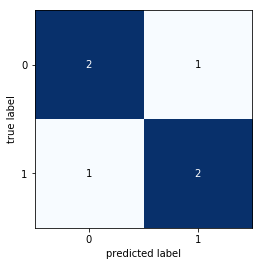

In [5]:
fig, ax = plot_confusion_matrix(conf_mat)
plt.show()

### 1.4 分类报告

In [6]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

   micro avg       0.60      0.60      0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



### 1.5 精准，召回和 F-measures

In [7]:
from sklearn import metrics
y_pred = [0, 1, 0, 0]
y_true = [0, 1, 0, 1]

In [8]:
print('precision_score : %.2f'% metrics.precision_score(y_true, y_pred))
print('recall_score : %.2f' % metrics.recall_score(y_true, y_pred))
print('f1_score : %.2f' % metrics.f1_score(y_true, y_pred))  
print('fbeta_score : %.2f' % metrics.fbeta_score(y_true, y_pred, beta=0.5))  
print('fbeta_score : %.2f' % metrics.fbeta_score(y_true, y_pred, beta=1))  
print('fbeta_score : %.2f' % metrics.fbeta_score(y_true, y_pred, beta=2)) 
print('precision_recall_fscore_support : \n', metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5))

precision_score : 1.00
recall_score : 0.50
f1_score : 0.67
fbeta_score : 0.83
fbeta_score : 0.67
fbeta_score : 0.56
precision_recall_fscore_support : 
 (array([0.666667, 1.      ]), array([1. , 0.5]), array([0.714286, 0.833333]), array([2, 2], dtype=int64))


### 1.6 F1_Score

In [9]:
from sklearn.metrics import f1_score
y_true = [0, 1, 1, 0, 1, 1]
y_pred = [0, 1, 1, 0, 0, 1]

- 宏平均F1的计算方法先对每个类别单独计算F1值，再取这些F1值的算术平均值作为全局指标。

- 而微平均F1的计算方法是先累加计算各个类别的a、b、c、d的值，再由这些值求出F1值。

- 对比：宏平均F1平等对待每一个类别，所以它的值主要受到稀有类别的影响，而微平均F1受到常见类别的影响比较大

In [10]:
f1_score(y_true, y_pred, average='macro')   #分别把0/1当成正样本，求各自的F1,再求算术平均,不考虑样本比例

0.8285714285714285

In [11]:
f1_score(y_true, y_pred, average='micro')   #分别把0/1当成正样本，求总的F1

0.8333333333333334

In [12]:
f1_score(y_true, y_pred, average='weighted')   #求0/1各自在训练集中的比例构成向量w，然后分别把0/1当成正样本，求各自的F1，则w*f1

0.8380952380952381

In [13]:
f1_score(y_true, y_pred, average=None)  #分别把0/1当成正样本，各自的F1

array([0.8     , 0.857143])

#### average默认取'binary'，把1当成正样本，再求F1

In [14]:
f1_score(y_true, y_pred, average='binary')  

0.8571428571428571

### 1.7 roc_curve、auc、roc_auc_score

#### 计算公式
FPR=FP/(FP+TN) 

TPR=TP/(TP+FN)  
predict_proba:模型预估各样本为正样本的概率 ;predict_proba >= thresholds时，样本为正样本  

一个模型对应于一条ROC曲线
不同的阈值对应于ROC曲线上不同的点

In [15]:
import numpy as np
from sklearn.metrics import roc_curve,auc,roc_auc_score

y_true = np.array([0, 0, 1, 1, 0, 1])
predict_proba= np.array([0.1, 0.4, 0.35, 0.8, 0.46 ,0.76])

#### metrics.roc_curve : 根据y_true、predict_proba返回FPR、TPR、thresholds

In [16]:
FPR, TPR, thresholds = roc_curve(y_true, predict_proba, pos_label=1) 
roc_curve_point = pd.DataFrame({'FPR':FPR,'TPR':TPR,'thresholds':thresholds}).round(3).iloc[:,[1,0,2]]
roc_curve_point

,TPR,FPR,thresholds
0,0.000,0.000,1.80
1,0.333,0.000,0.80
2,0.667,0.000,0.76
3,0.667,0.667,0.40
4,1.000,0.667,0.35
5,1.000,1.000,0.10


#### metrics.auc(FPR, TPR) : 根据FPR、TPR计算AUC

In [17]:
auc(FPR, TPR)

0.7777777777777778

#### metrics.roc_auc_score(y_true、predict_proba):根据y_true、predict_proba直接计算AUC

In [18]:
roc_auc_score(y_true, predict_proba)

0.7777777777777778

### 1.8 precision_recall_curve与average_precision_score

#### average_precision_score:根据y_true, probas_pred求PRC曲线下的面积

In [19]:
from sklearn.metrics import average_precision_score
y_true = np.array([0, 0, 1, 1])
probas_pred = np.array([0.1, 0.4, 0.35, 0.8])

average_precision_score(y_true,probas_pred)  

0.8333333333333333

#### metrics.precision_recall_curve ：根据y_true, probas_pred返回precision, recall, thresholds

In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true, probas_pred)
print(thresholds)

prc_point = pd.DataFrame({'precision':precision,'recall':recall}).round(3)
prc_point

[0.35 0.4  0.8 ]


,precision,recall
0,0.667,1.0
1,0.500,0.5
2,1.000,0.5
3,1.000,0.0


## 2. 回归指标

### 2.1 解释方差得分

In [21]:
from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
explained_variance_score(y_true, y_pred)  

0.9571734475374732

In [22]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
explained_variance_score(y_true, y_pred, multioutput='raw_values')

array([0.967742, 1.      ])

In [23]:
explained_variance_score(y_true, y_pred, multioutput=[0.3, 0.7])

0.9903225806451612

### 2.2 平均绝对误差

In [24]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

In [25]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mae=mean_absolute_error(y_true, y_pred)
mae1=mean_absolute_error(y_true, y_pred, multioutput='raw_values')
mae2=mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])
print(mae,mae1,mae2)

0.75 [0.5 1. ] 0.85


### 2.3 均方误差

In [26]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

In [27]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
mean_squared_error(y_true, y_pred)  

0.7083333333333334

### 2.4 均方误差对数

In [28]:
from sklearn.metrics import mean_squared_log_error
y_true = [3, 5, 2.5, 7]
y_pred = [2.5, 5, 4, 8]
mean_squared_log_error(y_true, y_pred)  

0.03973012298459379

In [29]:
y_true = [[0.5, 1], [1, 2], [7, 6]]
y_pred = [[0.5, 2], [1, 2.5], [8, 8]]
mean_squared_log_error(y_true, y_pred)

0.044199361889160536

### 3.5  R² score(可决系数)

##### klearn.metrics.r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
注意参数顺序，y_true, y_pred不能弄反

In [30]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

In [31]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
r2_score(y_true, y_pred, multioutput='variance_weighted')

0.9382566585956417

In [32]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
rs1 = r2_score(y_true, y_pred, multioutput='uniform_average')
rs2 = r2_score(y_true, y_pred, multioutput='raw_values')
rs3 = r2_score(y_true, y_pred, multioutput=[0.3, 0.7])
print(rs1, rs2, rs3)

0.9368005266622779 [0.965438 0.908163] 0.9253456221198156
